In [53]:
import xarray as xr  # "canonical" namespace short-hand
import pathlib
import datetime
import math


In [54]:
# Create a restart that has slightly different SWE
in_dir = pathlib.Path(
       '/Users/afox/Jedi/wrf_hydro_internal/build/wrf_hydro_nwm_jedi/test/Data/wrf_hydro_nwm_files')
in_file = in_dir / 'RESTART.2017010100_DOMAIN1'
out_file = in_dir / 'RESTART.2017010100_DOMAIN1_SNEQV_plus100'
out_file = in_dir / 'RESTART.2017010100_DOMAIN1_SNOWH_plus0point1'
ds = xr.open_dataset(in_file, engine="netcdf4")
ds['SNOWH'] = ds['SNOWH'] + 0.10
ds.to_netcdf(out_file)


In [55]:
%%time
ds = xr.open_dataset(
    "/Users/afox/Jedi/wrf_hydro_internal/build/wrf_hydro_nwm_jedi/test/Data/wrf_hydro_nwm_files/geometry_nwm_long_range_snow.nc", engine="netcdf4"
)
ds

CPU times: user 4.82 ms, sys: 2.52 ms, total: 7.34 ms
Wall time: 5.99 ms


<xarray.Dataset>
Dimensions:  (south_north: 24, west_east: 30, soil_layers_stag: 4, feature_id: 189)
Dimensions without coordinates: south_north, west_east, soil_layers_stag, feature_id
Data variables:
    HGT      (south_north, west_east) float32 ...
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
    ZS       (soil_layers_stag) float32 ...
    Length   (feature_id) float32 ...
    lat      (feature_id) float32 ...
    lon      (feature_id) float32 ...
Attributes: (12/21)
    domain_dir:             /home/vagrant/jedi/domains/private/taylor_park_v2_1
    config:                 nwm_long_range_snow
    hrldas_patch_filename:  hrldas_namelist_patches.json
    hydro_patch_filename:   hydro_namelist_patches.json
    lsm_dx:                 1000.0
    lsm_dy:                 1000.0
    ...                     ...
    stream_dx_name:         Length
    stream_xdim_name:       feature_id
    stream_lat_name:        lat
    stream_lon_name:        lon
    stream_src_file:        /home/vagrant/jedi/domains/private/taylor_park_v2...
    stream_src_md5:         b43e1fa8443092671bf1338556152f04

In [56]:
height = ds.HGT
latitude = ds.XLAT
longitude = ds.XLONG

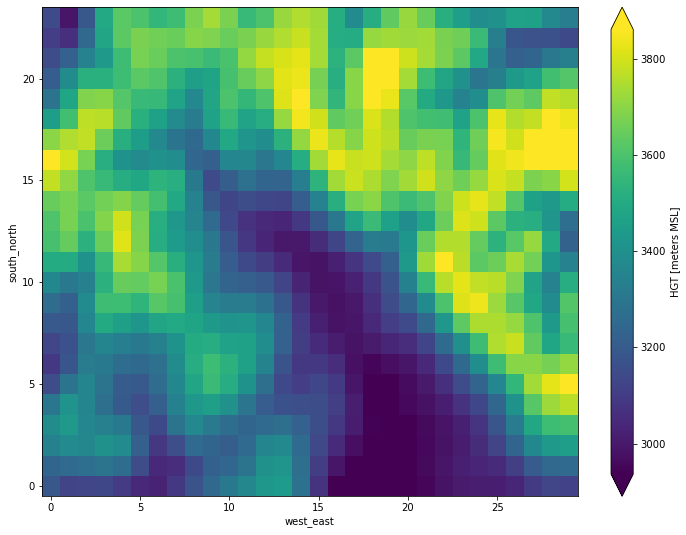

In [57]:
ds.HGT.plot(robust=True, figsize=(12, 9));

In [58]:
%%time
bkg = xr.open_dataset(
    "/Users/afox/Jedi/wrf_hydro_internal/build/wrf_hydro_nwm_jedi/test/Data/wrf_hydro_nwm_files/RESTART.2017010100_sneqv_plus5_DOMAIN1", engine="netcdf4"
)
bkg

CPU times: user 117 ms, sys: 23.2 ms, total: 140 ms
Wall time: 160 ms


<xarray.Dataset>
Dimensions:      (Time: 1, south_north: 24, soil_layers_stag: 4, west_east: 30, snow_layers: 3, sosn_layers: 7)
Dimensions without coordinates: Time, south_north, soil_layers_stag, west_east, snow_layers, sosn_layers
Data variables: (12/63)
    Times        (Time) |S19 ...
    SOIL_T       (Time, south_north, soil_layers_stag, west_east) float32 ...
    SNOW_T       (Time, south_north, snow_layers, west_east) float32 ...
    SMC          (Time, south_north, soil_layers_stag, west_east) float32 ...
    SH2O         (Time, south_north, soil_layers_stag, west_east) float32 ...
    ZSNSO        (Time, south_north, sosn_layers, west_east) float32 ...
    ...           ...
    QSPRINGXY    (Time, south_north, west_east) float32 ...
    FDEPTHXY     (Time, south_north, west_east) float32 ...
    RIVERCONDXY  (Time, south_north, west_east) float32 ...
    RIVERBEDXY   (Time, south_north, west_east) float32 ...
    EQZWT        (Time, south_north, west_east) float32 ...
    PEXPXY       (Time, south_north, west_east) float32 ...
Attributes:
    TITLE:          RESTART FILE FROM HRLDAS v20150506
    missing_value:  -1e+33
    START_DATE:     2007-10-01_00:00:00
    MAP_PROJ:       1
    LAT1:           38.83563
    LON1:           -106.78017
    DX:             1000.0
    DY:             1000.0
    TRUELAT1:       30.0
    TRUELAT2:       60.0
    STAND_LON:      -97.0
    MMINLU:         USGS

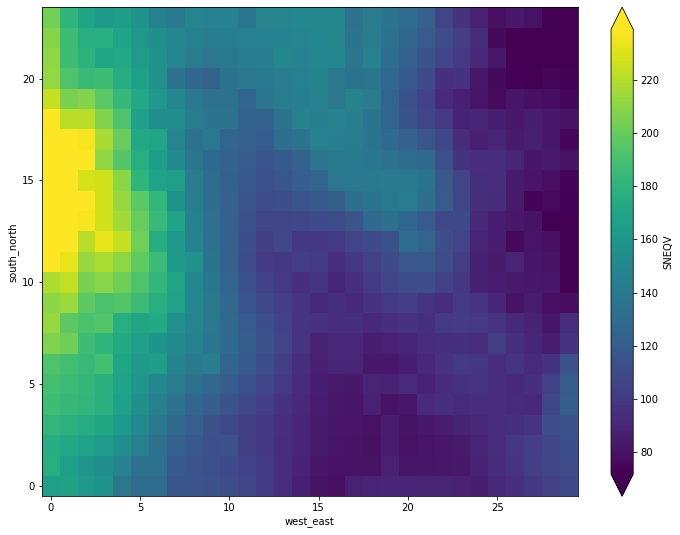

In [59]:
bkg.SNEQV.plot(robust=True, figsize=(12, 9));

CPU times: user 86.9 ms, sys: 14 ms, total: 101 ms
Wall time: 106 ms


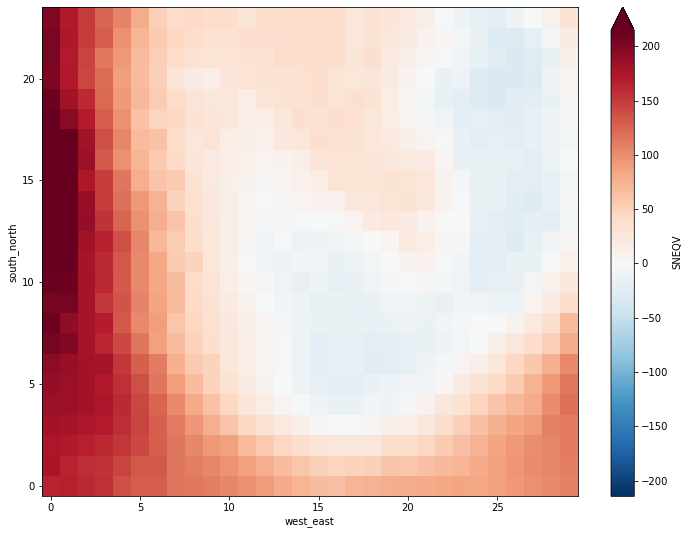

In [60]:
%%time
ana = xr.open_dataset(
    "/Users/afox/Jedi/wrf_hydro_internal/build/wrf_hydro_nwm_jedi/test/Data/letkf/letkf.lsm.ens.1.2017-01-01T00:00:00Z.PT0S", engine="netcdf4"
)

ana.SNEQV.plot(robust=True, figsize=(12, 9));

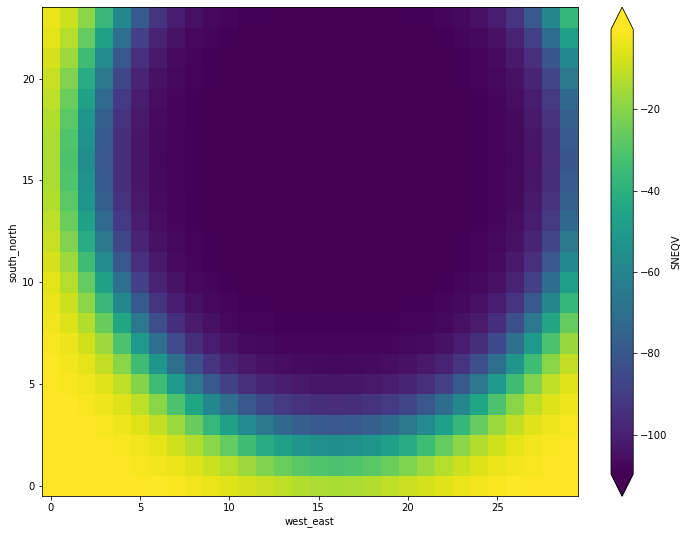

In [61]:
increment = ana.SNEQV - bkg.SNEQV
increment.plot(robust=True, figsize=(12, 9));

<xarray.DataArray 'SNOWH' (Time: 1, south_north: 24, west_east: 30)>
array([[[0.011258, 0.009728, ..., 0.010039, 0.009702],
        [0.012469, 0.012906, ..., 0.01289 , 0.013038],
        ...,
        [0.009549, 0.008631, ..., 0.011269, 0.010587],
        [0.010521, 0.006962, ..., 0.016178, 0.015044]]], dtype=float32)
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    MemoryOrder:  XY
    description:  
    units:

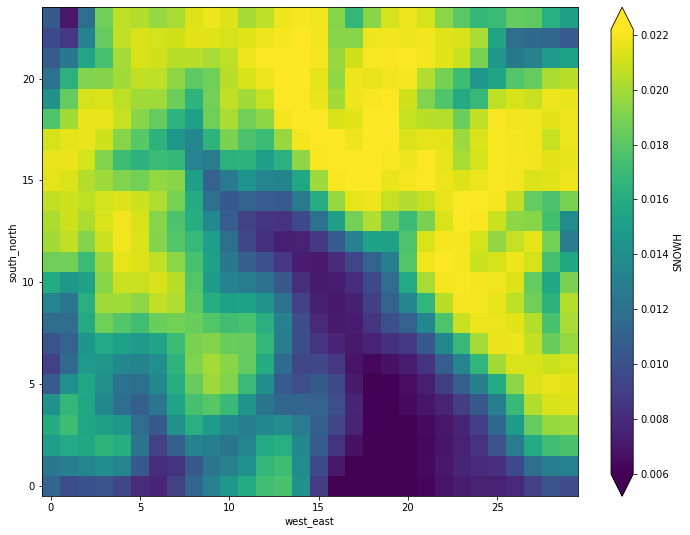

In [62]:
del inc

inc = xr.open_dataset(
    "/Users/afox/Jedi/Jedi_experiments/output/letkf/letkf_inc.lsm.ens.0.2017-01-01T00:00:00Z.PT0S", engine="netcdf4"
)

inc.SNOWH.plot(robust=True, figsize=(12, 9));

swe_inc = inc.SNOWH

inc.SNOWH


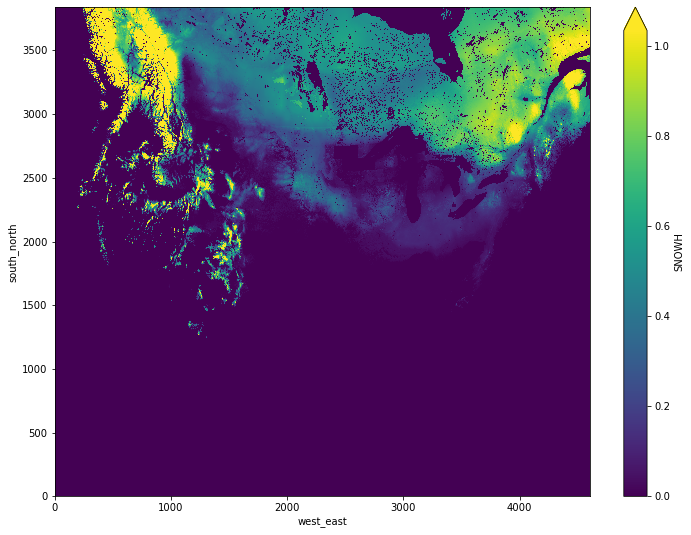

In [68]:
inc = xr.open_dataset(
    "/Users/afox/Jedi/Jedi_experiments/output/letkf/conus/letkf_inc.lsm.ens.0.2020-03-01T00:00:00Z.PT0S", engine="netcdf4"
)

inc.SNOWH.plot(robust=True, figsize=(12, 9));

(1600.0, 2000.0)

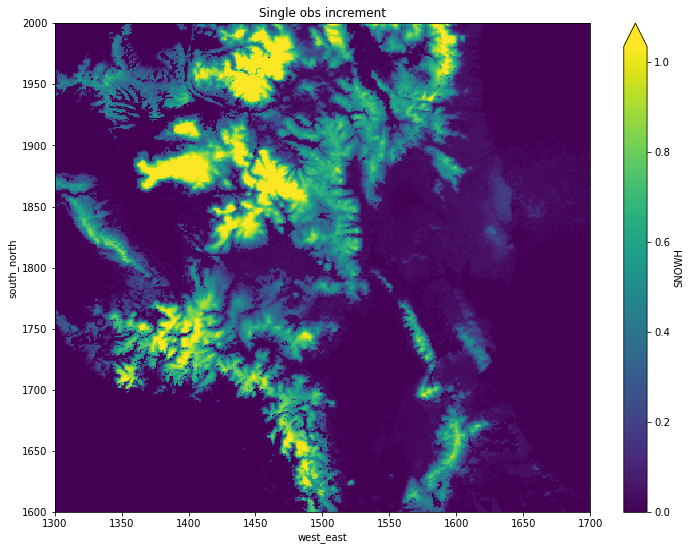

In [67]:
import matplotlib.pyplot as plt

inc.SNOWH.plot(robust=True, figsize=(12, 9));

plt.title("Single obs increment")
plt.xlim([1300, 1700])
plt.ylim([1600, 2000])


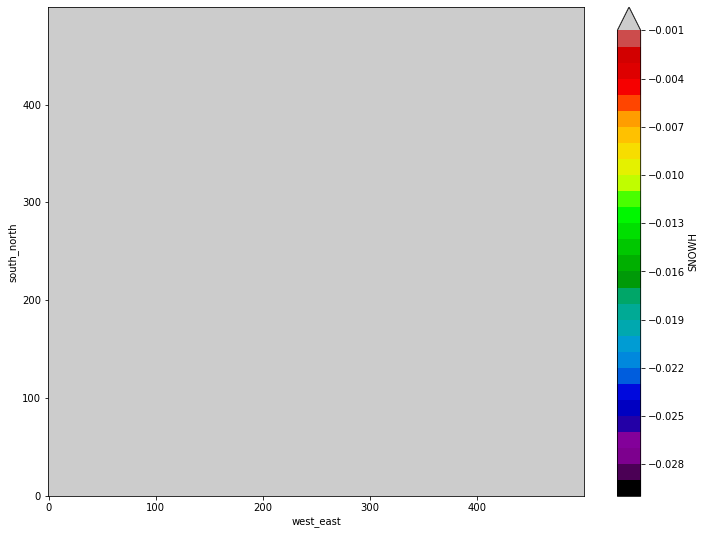

In [66]:
import numpy as np

depth_inc = inc.SNOWH

test = depth_inc[0, 1600:2100, 1200:1700]

level = np.arange(-0.03, 0, 0.001)

test.plot(levels=level, figsize=(12, 9), cmap = 'nipy_spectral')
